In [1]:
# ---------------------------------------------
# 日本の銘柄はpandas_datareaderで読み込めないので、スクレイピングのメソッドを作って読み込み。
from ok_datareaderYahooJP import datareaderYahooJP
import datetime

# 過去2か月間のデータを取得
from ok_datareaderYahooJP import datareaderYahooJP
end = datetime.datetime.today()
start = end - datetime.timedelta(days=60)
start_x = end - datetime.timedelta(days=30)

ucd = datareaderYahooJP(8057, start=start, end=end)
print('--- ucd.head() ---')
print(ucd.head())

# ---------------------------------------------
# 7日分日付を進める
import copy

# ucdのデータをdeapcopyする。
ucd_ahead7 = copy.deepcopy(ucd)
#print(ucd_ahead.head())

# ucd_aheadはリストではなくDataFrame
# マルチインデックスmultiindexをカラムcolumnに置きなおす。
ucd_ahead7.reset_index(inplace=True)
#print(ucd_ahead.head())

# ucd_aheadのDate部分に7日分を足す（7日分日付を進める）
import datetime
ucd_ahead7["Date"] = ucd_ahead7["Date"] + datetime.timedelta(days=7)
#print(ucd_ahead.head())

# indexを設定する
ucd_ahead7.set_index('Date', inplace=True)
#print(ucd_ahead.head())

print('--- ucd_ahead7.head() ---')
print(ucd_ahead7.head())

--- ucd.head() ---
            Open  High   Low  Close  Volume  Adj Close
Date                                                  
2017-05-10  2610  2637  2610   2637    8600       2637
2017-05-11  2637  2637  2613   2623    9600       2623
2017-05-12  2612  2623  2590   2623   10400       2623
2017-05-15  2576  2629  2576   2606    9100       2606
2017-05-16  2598  2625  2598   2624    8400       2624
--- ucd_ahead7.head() ---
            Open  High   Low  Close  Volume  Adj Close
Date                                                  
2017-05-17  2610  2637  2610   2637    8600       2637
2017-05-18  2637  2637  2613   2623    9600       2623
2017-05-19  2612  2623  2590   2623   10400       2623
2017-05-22  2576  2629  2576   2606    9100       2606
2017-05-23  2598  2625  2598   2624    8400       2624


In [5]:
#----------------------------------------
# 終値の指数の対数をとって、変化率を計算
import numpy as np
print('--- calculate logarithm of ucd ---')
ucd_ln = np.log(ucd.Close)
print(ucd_ln.head())

# ucd_ahead7の終値の指数の対数を取得
ucd_ahead7_ln = np.log(ucd_ahead7.Close)
print('--- calculate logarithm of ucd_ahead7 ---')
print(ucd_ahead7_ln.head())


--- calculate logarithm of ucd ---
Date
2017-05-10    7.877397
2017-05-11    7.872074
2017-05-12    7.872074
2017-05-15    7.865572
2017-05-16    7.872455
Name: Close, dtype: float64
--- calculate logarithm of ucd_ahead7 ---
Date
2017-05-17    7.877397
2017-05-18    7.872074
2017-05-19    7.872074
2017-05-22    7.865572
2017-05-23    7.872455
Name: Close, dtype: float64


(12376, 12397)

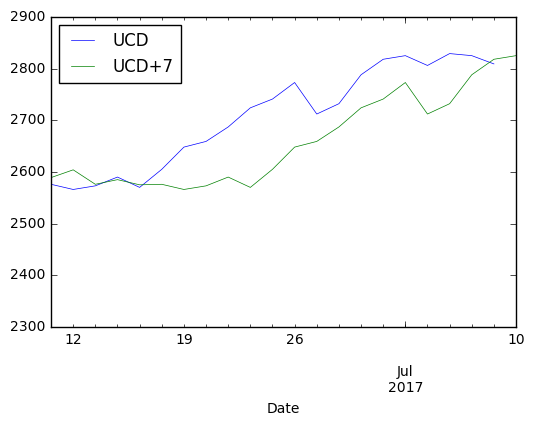

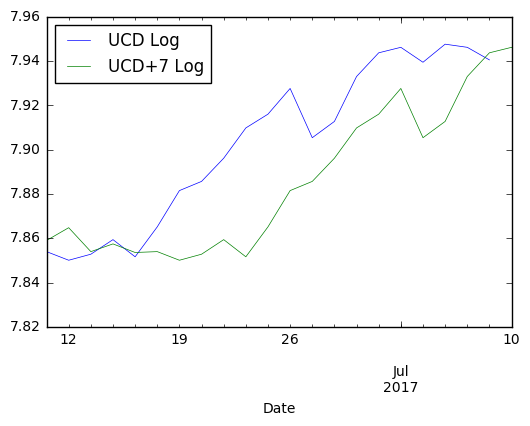

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt

# -------------------------------------
fig_1 = plt.figure()
g_1=fig_1.add_subplot(1,1,1)
ucd.Close.plot(ax=g_1, style='b-',linewidth=0.5, label='UCD')
ucd_ahead7.Close.plot(ax=g_1, style='g-',linewidth=0.5, label='UCD+7')
g_1.legend(loc='upper left')
g_1.set_xlim([start_x,end])
g_1.set_ylim([2300,2900])


# -------------------------------------
fig_2 = plt.figure()
g_2=fig_2.add_subplot(1,1,1)
ucd_ln.plot(ax=g_2, style='b-',linewidth=0.5, label='UCD Log')
ucd_ahead7_ln.plot(ax=g_2, style='g-',linewidth=0.5, label='UCD+7 Log')
g_2.legend(loc='upper left')
g_2.set_xlim([start_x,end])
